<a href="https://colab.research.google.com/github/GiulioAppetito/Progetto_MOBD_2122/blob/main/provaNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
%cd /content/drive/My\ Drive/ProgettoMOBD

/content/drive/My Drive/ProgettoMOBD


In [3]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn_pandas import CategoricalImputer
from sklearn.ensemble import IsolationForest, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.svm import SVC, LinearSVC
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

np.random.seed = 123

In [115]:
# LETTURA DATASET
data = pd.read_csv("train.csv", sep=",")
print(data.head())
# print("\nLabels: {}".format(np.unique(data.Y, return_counts=True)))

# print("\n# of NaNs values for each column:")
# print(data.isnull().sum(axis=0))

x = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()
# print(x.shape)
# print(y.shape)

# stratify: to mantain the same mean as y for y_tr and y_ts
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2, random_state=352, stratify=y)

# print(x_tr.shape)
# print(y_tr.shape)
# print(x_ts.shape)
# print(y_ts.shape)

print(np.unique(y, return_counts=True)[1]/len(y))
print(np.unique(y_tr, return_counts=True)[1]/len(y_tr))
print(np.unique(y_ts, return_counts=True)[1]/len(y_ts))

   F0  F1      F2  F3  F4  F5  F6  F7         F8      F9   F10  F11  F12  \
0  39  K1   77516  R1  13  Q1  P1  M1  caucasian    Male  2174    0   40   
1  50  K2   83311  R1  13  Q2  P2  M2  caucasian    Male     0    0   13   
2  38  K3  215646  R2   9  Q3  P3  M1  caucasian    Male     0    0   40   
3  53  K3  234721  R3   7  Q2  P3  M2      black    Male     0    0   40   
4  28  K3  338409  R1  13  Q2  P4  M3      black  Female     0    0   40   

    F13  Y  
0   USA  0  
1   USA  0  
2   USA  0  
3   USA  0  
4  Cuba  0  
[0.75919044 0.24080956]
[0.75917537 0.24082463]
[0.75925073 0.24074927]


In [116]:
# valori nan
imp = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
x_tr_notnan = imp.fit_transform(x_tr)
x_ts_notnan = imp.transform(x_ts)

#gestione features categoriche
#dato che però questi sono ndarrays, per fare la one hot coded technique dobbiamo usare dataframes

x_tr_df = pd.DataFrame(x_tr_notnan)
x_ts_df = pd.DataFrame(x_ts_notnan)

x_tr_df.columns=['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']
x_ts_df.columns=['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']

# one hot code

final_df_tr = pd.concat([x_tr_df,pd.get_dummies(x_tr_df['F1'])],axis = 1)
final_df_tr.drop('F1', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(x_tr_df['F7'])],axis = 1)
final_df_tr.drop('F7', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(x_tr_df['F9'])],axis = 1)
final_df_tr.drop('F9', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(x_tr_df['F8'])],axis = 1)
final_df_tr.drop('F8', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(x_tr_df['F5'])],axis = 1)
final_df_tr.drop('F5', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(x_tr_df['F6'])],axis = 1)
final_df_tr.drop('F6', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(x_tr_df['F13'])],axis = 1)
final_df_tr.drop('F13', axis=1, inplace=True)

final_df_tr.drop('F3', axis=1, inplace=True)

#print(final_df_tr.head())


final_df_ts = pd.concat([x_ts_df,pd.get_dummies(x_ts_df['F1'])],axis = 1)
final_df_ts.drop('F1', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(x_ts_df['F7'])],axis = 1)
final_df_ts.drop('F7', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(x_ts_df['F9'])],axis = 1)
final_df_ts.drop('F9', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(x_ts_df['F8'])],axis = 1)
final_df_ts.drop('F8', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(x_ts_df['F5'])],axis = 1)
final_df_ts.drop('F5', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(x_ts_df['F6'])],axis = 1)
final_df_ts.drop('F6', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(x_ts_df['F13'])],axis = 1)
final_df_ts.drop('F13', axis=1, inplace=True)

final_df_ts.drop('F3', axis=1, inplace=True)

#print(final_df_ts.tail())
#print(final_df_tr.tail())

# la align la stiamo usando perchè avendo usato get_dummies purtroppo se qualche valore che compare in uno dei due set
# non è presente nell'altro, non verrà generata la colonna corrispondente, per cui non è detto che i due dataframe che si 
# vanno ad usare abbiamo stesso insieme di colonne.
# tantomeno se si va ad usare un dataset che non si conosce, non si può sapere se in futuro ci saranno valori di cui non 
# si è tenuto conto etc
x_tr_df, x_ts_df = final_df_tr.align(final_df_ts, join="outer", axis=1,fill_value=0)
print(x_tr_df.tail())
print(x_ts_df.tail())


       Cambodia  Canada  Caribbean  China  Columbia  Cuba  Dominican-Republic  \
26043         0       0          0      0         0     0                   0   
26044         0       0          0      0         0     0                   0   
26045         0       0          0      0         0     0                   0   
26046         0       0          0      0         0     0                   0   
26047         0       0          0      0         0     0                   0   

       Ecuador  El-Salvador  England  ... Taiwan Thailand USA Vietnam  \
26043        0            0        0  ...      0        0   1       0   
26044        0            0        0  ...      0        0   1       0   
26045        0            0        0  ...      0        0   1       0   
26046        0            0        0  ...      0        0   1       0   
26047        0            0        0  ...      0        0   1       0   

      Yugoslavia american  asian  black  caucasian  other  
26043         

In [117]:
# SCALING
print("Robust Scaler")
scaler = RobustScaler()
x_tr_scaled = scaler.fit_transform(x_tr_df)
x_ts_scaled = scaler.transform(x_ts_df)

print("Media distribuzione di partenza: {}".format(np.mean(x_tr_df, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_tr_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_tr_df, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_tr_scaled, axis=0)))

print("Media distribuzione di partenza: {}".format(np.mean(x_ts_df, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_ts_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_ts_df, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_ts_scaled, axis=0)))

Robust Scaler
Media distribuzione di partenza: Cambodia     0.000653
Canada       0.003839
Caribbean    0.000537
China        0.002419
Columbia     0.001766
               ...   
american     0.009252
asian        0.031749
black        0.094556
caucasian    0.855920
other        0.008523
Length: 88, dtype: float64
Media distribuzione scalata: [ 6.52641278e-04  3.83906634e-03  5.37469287e-04  2.41861179e-03
  1.76597052e-03  2.91769042e-03  2.11148649e-03  9.59766585e-04
  3.30159705e-03  2.72573710e-03  8.06683814e-02  1.08609763e+03
  8.76982494e+01  8.92199017e-02  9.55337685e-02  2.80763718e-02
  3.31273034e-01  8.82985258e-04  4.06941032e-03  7.29422604e-04
  1.91953317e-03  1.19011057e-03  4.22297297e-04  6.91031941e-04
  4.22297297e-04  3.10964373e-03  1.45884521e-03  7.67813268e-04
  2.22665848e-03  2.57217445e-03  2.11148649e-03  3.91968673e-02
  7.86624693e-02 -2.47658170e-01  2.94456388e-02  6.48802211e-02
  3.48203317e-02  4.60687961e-04  1.91953317e-04  4.99078624e-04
  2.5

In [118]:
# ANOMALY DETECTION CON ISOLATION FOREST
print("Initial distribution")
print(len(x_tr))
print(np.unique(y_tr, return_counts=True)[1]/len(y_tr))

anomaly_detector = IsolationForest()
anomaly_detector.fit(x_tr_scaled)
is_inlier = anomaly_detector.predict(x_tr_scaled)

print(np.unique(is_inlier, return_counts=True))
x_tr_not_anomalous = x_tr_scaled[is_inlier==1,:]
y_tr_not_anomalous = y_tr[is_inlier==1]

print("Distribution after anomaly detection")
print(len(x_tr_not_anomalous))
print(np.unique(y_tr_not_anomalous, return_counts=True)[1]/len(y_tr_not_anomalous))

Initial distribution
26048
[0.75917537 0.24082463]
(array([-1,  1]), array([   74, 25974]))
Distribution after anomaly detection
25974
[0.75933626 0.24066374]


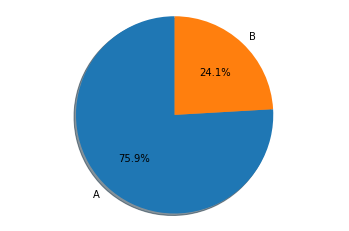

Size del dataset prima del sampler: 26048
Size del dataset dopo il sampler: 12546


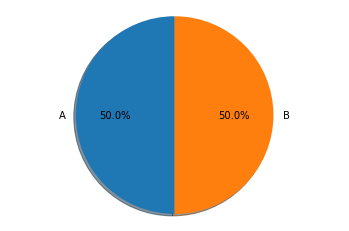

In [119]:
# BALANCING
n_classes = len(np.unique(y_tr))
fig, ax = plt.subplots()
sizes = [len(y_tr[y_tr==i]) for i in range(n_classes)]
class_names = [chr(ord('A')+i) for i in range(n_classes)]

ax.pie(sizes, labels=class_names, autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()

sampler = RandomUnderSampler(random_state=42)
x_tr_balanced, y_tr_balanced = sampler.fit_resample(x_tr_scaled, y_tr)

print("Size del dataset prima del sampler: {}".format(x_tr_scaled.shape[0]))
print("Size del dataset dopo il sampler: {}".format(x_tr_balanced.shape[0]))

fig, ax = plt.subplots()
sizes = [len(y_tr_balanced[y_tr_balanced==i]) for i in range(n_classes)]
class_names = [chr(ord('A')+i) for i in range(n_classes)]

ax.pie(sizes, labels=class_names, autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()

In [120]:

def train_evaluate(model, x_tr, y_tr, x_ts, y_ts):
  model.fit(x_tr, y_tr)
  y_tr_pred = model.predict(x_tr)
  y_ts_pred = model.predict(x_ts)
  print("Accuracy on training set {}".format(accuracy_score(y_tr, y_tr_pred)))
  print("F1 score on training set {}".format(f1_score(y_tr, y_tr_pred)))
  print(confusion_matrix(y_tr, y_tr_pred))
  print("Accuracy on test set {}".format(accuracy_score(y_ts, y_ts_pred)))
  print("F1 score on test set {}".format(f1_score(y_ts, y_ts_pred)))
  print(confusion_matrix(y_ts, y_ts_pred))
print("******* SVC")
classifier = SVC(kernel='rbf', C = 0.4)
print("Training on scaled data")
train_evaluate(classifier, x_tr_scaled, y_tr, x_ts_scaled, y_ts)
print("******* SVC")

classifier = SVC(kernel='rbf', C = 0.4)
print("Training on balanced data")
train_evaluate(classifier, x_tr_balanced, y_tr_balanced, x_ts_scaled, y_ts)
print("******* SVC")

classifier = SVC(kernel='rbf', C = 0.4)
print("Training on not anomalous data")
train_evaluate(classifier, x_tr_not_anomalous, y_tr_not_anomalous, x_ts_scaled, y_ts)

# CLASSIFICATION: DECISION TREES
print("******* DecisionTreeClassifier")
classifier = DecisionTreeClassifier(criterion="gini", max_depth=5)
train_evaluate(classifier, x_tr_not_anomalous, y_tr_not_anomalous, x_ts_scaled, y_ts)

# CLASSIFICATION: METODI ENSEMBLE
print("******* RandomForestClassifier")
classifier = RandomForestClassifier(max_depth=5, n_estimators=100)
train_evaluate(classifier, x_tr_not_anomalous, y_tr_not_anomalous, x_ts_scaled, y_ts)
print("******* GradientBoostingClassifier")
classifier = GradientBoostingClassifier(max_depth=5, n_estimators=100)
train_evaluate(classifier, x_tr_not_anomalous, y_tr_not_anomalous, x_ts_scaled, y_ts)
print("******* AdaBoostClassifier")
classifier = AdaBoostClassifier(n_estimators=100)
train_evaluate(classifier, x_tr_not_anomalous, y_tr_not_anomalous, x_ts_scaled, y_ts)




******* SVC
Training on scaled data
Accuracy on training set 0.8019809582309583
F1 score on training set 0.40134633240482825
[[19161   614]
 [ 4544  1729]]
Accuracy on test set 0.8037770612620913
F1 score on test set 0.4055813953488372
[[4799  146]
 [1132  436]]
******* SVC
Training on balanced data
Accuracy on training set 0.6309580742866252
F1 score on training set 0.45733708391936245
[[5965  308]
 [4322 1951]]
Accuracy on test set 0.7988638108398587
F1 score on test set 0.4314236111111111
[[4706  239]
 [1071  497]]
******* SVC
Training on not anomalous data
Accuracy on training set 0.8022253022253022
F1 score on training set 0.40023350846468186
[[19123   600]
 [ 4537  1714]]
Accuracy on test set 0.8037770612620913
F1 score on test set 0.4055813953488372
[[4799  146]
 [1132  436]]
******* DecisionTreeClassifier
Accuracy on training set 0.8483098483098483
F1 score on training set 0.6161340607950118
[[18872   851]
 [ 3089  3162]]
Accuracy on test set 0.8401658222017504
F1 score on test

In [110]:
# ESEMPIO DI PIPELINE E DI GRID SEARCH CROSS VALIDATION
pipe = Pipeline([
                 ('imputer', SimpleImputer()),
                 ('scaler', StandardScaler()),
                 ('classificator', LinearSVC(dual=False))
])
params = {'classificator__C':np.logspace(-2,1,4)}
gs = GridSearchCV(estimator=pipe, param_grid = params)
gs.fit(x_tr, y_tr)

print(gs.cv_results_)
print(gs.best_params_)
print(gs.best_score_)

print("Accuracy training set {}".format(accuracy_score(y_tr, gs.predict(x_tr))))
print("Accuracy test set {}".format(accuracy_score(y_ts, gs.predict(x_ts))))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

ValueError: ignored